## NDBC Buoy Meteorological Data Request

Notebook from Unidata Siphon Examples: https://unidata.github.io/siphon/latest/examples/ndbc/buoy_met_request.html#sphx-glr-examples-ndbc-buoy-met-request-py

The NDBC keeps a 45-day recent rolling file for each buoy. This example shows how to access the basic meteorological data from a buoy and make a simple plot.

In [1]:
import matplotlib.pyplot as plt

from siphon.simplewebservice.ndbc import NDBC

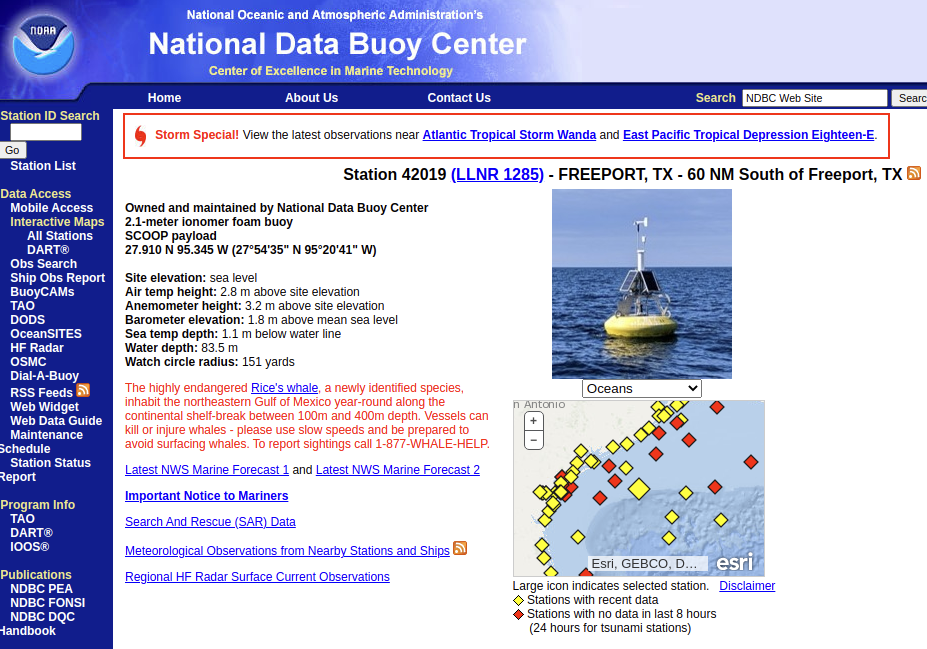

In [2]:
df = NDBC.realtime_observations('42019')
df.head()

,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,average_wave_period,dominant_wave_direction,pressure,air_temperature,water_temperature,dewpoint,visibility,3hr_pressure_tendency,water_level_above_mean,time
0,NaN,9.0,12.0,1.5,6.0,4.6,64.0,1020.5,18.4,25.9,15.0,NaN,NaN,NaN,2021-11-04 21:50:00+00:00
1,NaN,9.0,14.0,NaN,NaN,NaN,NaN,1020.3,18.7,25.9,15.3,NaN,NaN,NaN,2021-11-04 21:40:00+00:00
2,NaN,9.0,14.0,NaN,NaN,NaN,NaN,1020.3,18.6,25.9,15.3,NaN,NaN,NaN,2021-11-04 21:30:00+00:00
3,NaN,9.0,12.0,NaN,NaN,NaN,NaN,1020.2,18.5,26.0,15.1,NaN,NaN,NaN,2021-11-04 21:20:00+00:00
4,NaN,9.0,12.0,NaN,NaN,NaN,NaN,1020.2,18.5,26.0,15.2,NaN,NaN,NaN,2021-11-04 21:10:00+00:00


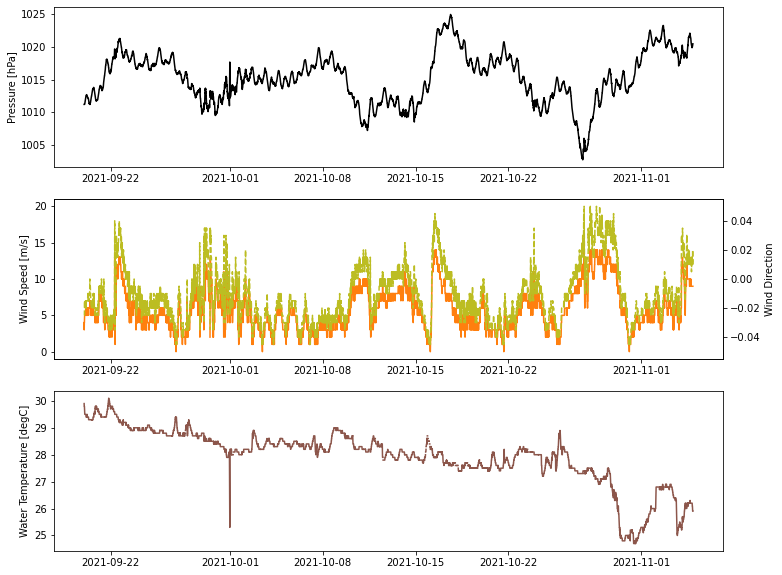

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))
ax2b = ax2.twinx()

# Pressure
ax1.plot(df['time'], df['pressure'], color='black')
ax1.set_ylabel('Pressure [hPa]')

# Wind speed, gust, direction
ax2.plot(df['time'], df['wind_speed'], color='tab:orange')
ax2.plot(df['time'], df['wind_gust'], color='tab:olive', linestyle='--')
ax2b.plot(df['time'], df['wind_direction'], color='tab:blue', linestyle='-')
ax2.set_ylabel('Wind Speed [m/s]')
ax2b.set_ylabel('Wind Direction')

# Water temperature
ax3.plot(df['time'], df['water_temperature'], color='tab:brown')
ax3.set_ylabel('Water Temperature [degC]')

plt.show()
